## Université de Bordeaux,  Master Mention Informatique

## Intelligence Artificielle

### Deep Learning, feuille 1

### Présentation

Le but de ce premier TD est de vous familiariser avec les réseaux de neurones et leur entraînement. Nous allons passer en revue les éléments de base suivant :

 - données d'apprentissage, 
 
 - fonction de perte (loss function)
 
 - descente de gradient
 
 Pour cela, nous allons utiliser un réseau de neurone (composé d'un seul neurone en fait) pour deux tâches : 
 
  - une régression linéaire simple
  
  - une classification binaire.

Commençons par importer quelques unes des bibliothèques usuelles :

In [3]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

### On génère les données 

Afin de réaliser une régression linéaire simple, nous allongs générer un nuage de points. Exécutez le code de la cellule suivante :

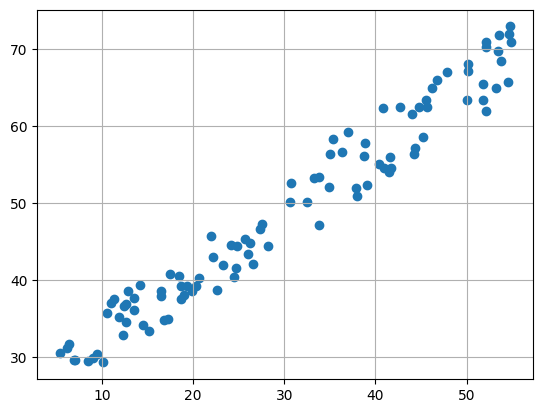

In [4]:
#Data: 
def generate(m, sizeNoise, slope, intersect):    
    x = [rd.random()*50 + 5 for i in range(m)]
    noise = [rd.random() * sizeNoise for i in range(m)]#np.rand(m,1) * sizeNoise
    y = [intersect + slope*x[i] + noise[i] for i in range(m)] 
    return np.array([x]), np.array([y])

m = 100
sizeNoise = 10
a = 0.8
b =  20
    
X, Y = generate(m, sizeNoise, a, b)
plt.grid()
plt.scatter(X, Y)

### Exercice 1. Un neurone :

Comme vu en cours, un neurone formel est représenté comme suit : 

![Un neurone formel (Mc Culloch & Pitts (1943))](img/formal_neuron_s.png)

1. Nommez chacun des élements du neurone.

2. Ecrivez une fonction <code>neuron(x, w, b, f)</code> permettant d'implémenter ce neurone.

In [9]:
def neuron(x : np.array, w, b, f):
    sum = 0
    for wi, xi in zip(w, x):
        sum += (wi * xi)
    z = sum + b
    y = f(z)
    return y

3. Définissez deux fonctions <code>id</code> et <code>sigmoid</code> définies par :
$$
id(z) = z \mbox{ et } sigmoid(z) = \frac{1}{1+ e^{-z}}.
$$

In [10]:
def id(z):
    return z

def sigmoid(z):
    return 1 / (1 + (np.exp(-z)))

4. Testez vos fonctions. L'exécution de la cellule suivante devrait donner le résultat affiché.

In [11]:
x = np.array([1])
w = np.array([1])
b = [1]

y_hat = neuron(x, w, b, id)
print('x: ', x)
print('y_hat: ', y_hat)

x:  [1]
y_hat:  [2]


### Exercice 2. Régression linéaire : 

Dans cet exercice, nous allons entraîner un neurone pour réaliser une régression linéaire simple. 

1. Dessiner le neurone qui sera utilisé. Identifiez bien les paramètres à trouver.

2. Ecrivez le code de la fonction <code>loss(y, y_hat)</code> définie comme la moyenne des carrés des écarts : 

$$
loss\left(y, \hat{y}\right) = \frac 1 {2*n} \sum_{i=1}^n \left(\hat{y_i} - y_i)\right)^2. 
$$

In [ ]:
def loss(y : np.array, y_hat : np.array):
    sum = 0
    for y_hat_i, y_i in zip(y_hat, y):
        sum += (y_hat_i - y_i)
    return np.mean(sum * sum)


3. Calculez le gradient de la fonction ${\cal L} = loss$ par rapport aux deux variables $w$ et $b$.

4. Ecrivez la focntion <code>gradient(x, y_hat, y)</code> retournant le gradient de la fonction $\cal L$.

5. Ecrivez une fonction <code>train(x, y, eta, epochs)</code> qui réalise une déscente du gradient de la fonction $\cal L$ afin de trouver les paramètres $w$ et $b$ minimisant la valeur de $\cal L$. 

6. Entraînez votre neurone. Prenez $0.001$ comme valeur pour le pas d'apprentissage, et $10000$ pour le nombre d'epochs.

7. Donnez l'équation de la droite de régression obtenue. Ecrivez l'instruction permettant de calculer les valeurs prédites.

8. Dessinez la droite de régression sur la même figure que le nuage de point.

9. Comparez le résultat obtenu avec la droite donnée par <code>linregress</code> du sous module <code>stats</code> du module <code>scipy</code>.

### Exercice 3. Régression logistique :

Dans cet exercice, nous allons transformer le neurone afin de l'utiliser pour réaliser une classification. Nous allons nous limiter à une classification bianire : les élements appartiennent soit à une classe 0 soit à une classe 1.  

1. Comment devons-nous appeler la "fonction" <code>neuron</code> pour que le fonction d'activation soit la sigmoid ?

2. Exécutez la cellule suivante pour générer les données, les découper en deux parties train et test, etc. Observez le résultat de la cellule.

In [12]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=1000, n_features=1, n_classes=2, 
                           n_informative=1, n_redundant=0, n_repeated=0,
                          n_clusters_per_class=1)

X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape)
print(y_train.shape)
print(np.unique(y))

ModuleNotFoundError: No module named 'sklearn'

3. Définissez la nouvelle fonction de perte. Nous allons utiliser la fonction *cross_entropy* vue en cours :

$$
\cal L = -\frac 1 n \sum_{i=1} \left(y_i\times \log\left(\hat{y}_i\right) + (1-y_i)\log(1-\hat{y}_i)\right)
$$

4. Ecrivez les expressions mathématiques de ce que calcule votre neurone.

5. Calculez le gradient de $\cal L$ et écrivez la fonction correspondante.
   
Indication : la dérivée de la fonction sigmoid est : $\sigma'(z) = \sigma(z)\left(1 - \sigma(z)\right)$.

6. Adaptez une fonction <code>train(x, y, nu, epochs)</code> pour réaliser une déscente du gradient de la fonction $\cal L$ afin de trouver les paramètres $w$ et $b$ minimisant la valeur de $\cal L$. 

7. Exécutez la cellule suivante pour que vos calculs matriciels puissent se faire et entraînez votre neurone.

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[1], X_train.shape[0]))
print(X_train.shape)
print(y_train.shape)

8. Evaluez votre modèle. Pour cela : 

8.1. Exécutez la cellule suivante pour formater les données de test.

In [ ]:
X_test = np.reshape(X_test, (X_test.shape[1], X_test.shape[0]))

8.2. Appliquez votre neurone aux données de test et observez le résultat obtenu.

8.3. Transformez les sorties en 0 et 1 : 

8.4. Evaluez la qualité du modèle obtenu 